In [2]:
import os 
import csv 
import pandas as pd 

In [5]:
reviews = pd.read_csv("WK7/kaggle-sentiment/train.tsv", delimiter = "\t")
reviews.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

# Visualizing the Data 

In [6]:
label_count = pd.DataFrame(reviews.Sentiment.value_counts())
label_count.columns = ["count"]
label_count["sentiment"] = label_count.index 
label_count.reset_index(drop = True, inplace = True)
label_count

count  sentiment
0  79582          2
1  32927          3
2  27273          1
3   9206          4
4   7072          0

In [7]:
#Packages needed for my graphs 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm 

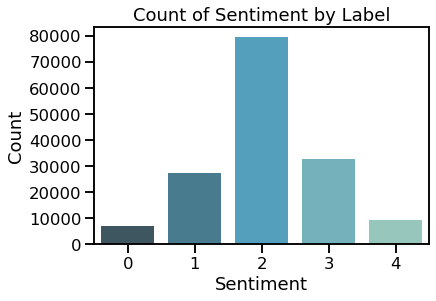

In [8]:
with sns.plotting_context("talk"): 
    sns.barplot(y = "count", x = "sentiment", data = label_count, 
                palette = "GnBu_d")
    plt.title("Count of Sentiment by Label")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")

### When creating the testing and training data, I should have an equal sample size for each sentiment label. The label with the smallest number of entries is 0 with 7072 entries. Therefore I should randomly select 7072 reviews for the other 4 sentiment labels. This will help ensure that the training and testing data is balanced.

## Looking at sentence id to determine the number of phrases each sentence is broken up into.

In [9]:
sentence_phrase_count = pd.DataFrame(reviews.groupby("SentenceId")["Phrase"].count())
sentence_phrase_count.head()

Phrase
SentenceId        
1               63
2               18
3               35
4               40
5               10

In [10]:
count_phrase_counts = pd.DataFrame(sentence_phrase_count.Phrase.value_counts())
count_phrase_counts["number_of_phrases"] = count_phrase_counts.index
count_phrase_counts.columns = ["count", "phrases_per_review"]
count_phrase_counts.reset_index(drop = True, inplace = True)
count_phrase_counts.head()

count  phrases_per_review
0    375                  14
1    340                  19
2    335                  15
3    328                  16
4    325                  18

In [11]:
tick_mark_labels = []
for num in range (1, 64): 
    if num%5 == 0: 
        tick_mark_labels.append(num)
print(tick_mark_labels)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


In [12]:
tick_marks = []
for num in tick_mark_labels: 
    new_num = num - 1
    tick_marks.append(new_num)
print(tick_marks)

[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59]


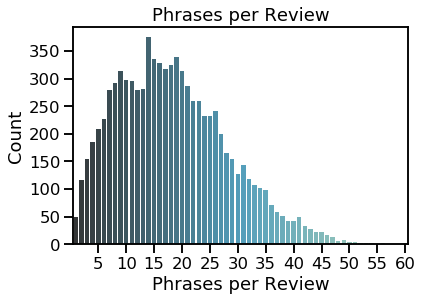

In [13]:
with sns.plotting_context("talk"):
    sns.barplot(y = "count", x = "phrases_per_review", 
                 data = count_phrase_counts, palette = "GnBu_d")
    plt.title("Phrases per Review")
    plt.xlabel("Phrases per Review")
    plt.ylabel("Count")
    plt.xticks(tick_marks, tick_mark_labels, rotation = 0)

### The majority of reviews were broken into 7 - 25 phrases...

## Creating a dictionary from the reviews to make a word cloud to visualize the phrases.

In [14]:
from collections import Counter 
def make_dic(df, column): 
    list_ = df[column].tolist()
    string = " ".join(list_).split()
    dic = Counter(string)
    return(dic)

In [15]:
dic = make_dic(reviews, "Phrase")

In [16]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np 

In [17]:
def word_cloud(mask_path, dic, title):    
    with sns.plotting_context("talk"):
        mask = np.array(Image.open(mask_path))
        word_cloud = WordCloud(background_color = "white", max_words = 750, 
                  mask = mask, max_font_size = 125)
        word_cloud.generate_from_frequencies(dic)
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize = [8,8])
        plt.imshow(word_cloud.recolor(color_func = image_colors), 
                   interpolation = "bilinear")
        plt.title(title)
        plt.axis("off")

def all_words_df(dic): 
    df = pd.DataFrame.from_dict(dic, orient = "index")
    df.columns = ["count"]
    df["word"] = df.index 
    df.reset_index(drop = True, inplace = True)
    return(df)

def top_words_df(df, num_of_words): 
    df.sort_values(by = ["count"], ascending = False, inplace = True)
    df.reset_index(drop = True, inplace = True)
    new_df = df[:num_of_words]
    
    return(new_df)

def top_words_barplot(df, title): 
    with sns.plotting_context("talk"): 
        sns.barplot(y = "count", x = "word", data = df, palette = "GnBu_d")
        plt.ylabel("Count")
        plt.xlabel("Word")
        plt.xticks(rotation = 90)
        plt.title(title)

def unique_total_words( type_of_review, df): 
    print("The total number of words in the", type_of_review, "reviews is", sum(df["count"]))
    print("The total number of unique words in the", type_of_review, "reviews is", len(df))

In [18]:
word_cloud("tomatoes.png", dic, "Rotten Tomatoes Reviews")

FileNotFoundError: [Errno 2] No such file or directory: 'tomatoes.png'

In [ ]:
words_df = all_words_df(dic)
words_df.head()

In [ ]:
top_20 = top_words_df(words_df, 20)
top_20

In [ ]:
top_words_barplot(top_20, "Top 20 Words")

In [ ]:
unique_total_words("all reviews uncleaned", words_df)

## Separating and visualizing for each sentiment label 

In [19]:
def sentiment_subset(df, sentiment_label): 
    df = df[df["Sentiment"] == sentiment_label]
    df.reset_index(drop = True, inplace = True)
    print(df.shape)
    return(df)

In [20]:
reviews_0 = sentiment_subset(reviews, 0)
reviews_0.head()

(7072, 4)


PhraseId  SentenceId                                             Phrase  \
0       102           3    would have a hard time sitting through this one   
1       104           3          have a hard time sitting through this one   
2       158           5  Aggressive self-glorification and a manipulati...   
3       160           5    self-glorification and a manipulative whitewash   
4       202           7             Trouble Every Day is a plodding mess .   

   Sentiment  
0          0  
1          0  
2          0  
3          0  
4          0

In [21]:
reviews_1 = sentiment_subset(reviews, 1)
reviews_1.head()

(27273, 4)


PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1        34           1  the gander , some of which occasionally amuses...   
2        48           1       but none of which amounts to much of a story   
3        50           1           none of which amounts to much of a story   
4        82           3  Even fans of Ismail Merchant 's work , I suspe...   

   Sentiment  
0          1  
1          1  
2          1  
3          1  
4          1

In [22]:
reviews_2 = sentiment_subset(reviews, 2)
reviews_2.head()

(79582, 4)


PhraseId  SentenceId                                             Phrase  \
0         2           1  A series of escapades demonstrating the adage ...   
1         3           1                                           A series   
2         4           1                                                  A   
3         5           1                                             series   
4         6           1  of escapades demonstrating the adage that what...   

   Sentiment  
0          2  
1          2  
2          2  
3          2  
4          2

In [23]:
reviews_3 = sentiment_subset(reviews, 3)
reviews_3.head()

(32927, 4)


PhraseId  SentenceId                                             Phrase  \
0        22           1                                 good for the goose   
1        23           1                                               good   
2        47           1                                             amuses   
3        65           2  This quiet , introspective and entertaining in...   
4        68           2             quiet , introspective and entertaining   

   Sentiment  
0          3  
1          3  
2          3  
3          3  
4          3

In [24]:
reviews_4 = sentiment_subset(reviews, 4)
reviews_4.head()

(9206, 4)


PhraseId  SentenceId                                             Phrase  \
0        64           2  This quiet , introspective and entertaining in...   
1        67           2  quiet , introspective and entertaining indepen...   
2        75           2                                       entertaining   
3        78           2                                   is worth seeking   
4       118           4  A positively thrilling combination of ethnogra...   

   Sentiment  
0          4  
1          4  
2          4  
3          4  
4          4

### Phrase

In [25]:
dic_0 = make_dic(reviews_0, "Phrase")

In [34]:
# word_cloud("horrible.png", dic_0, "Bad Reviews: \n Uncleaned")

In [35]:
words_0 = all_words_df(dic_0)
words_0.head()

count   word
0    143  would
1    245   have
2   2572      a
3     58   hard
4    142   time

In [36]:
top_words_0 = top_words_df(words_0, 20)
top_words_0

count   word
0    3722      ,
1    3070    the
2    2572      a
3    2507    and
4    2236     of
5    1973      .
6    1880     to
7    1363     is
8    1136     's
9    1130   that
10    998     in
11    927     it
12    757  movie
13    738     as
14    576   this
15    509    for
16    488    its
17    477   film
18    437   with
19    424    n't

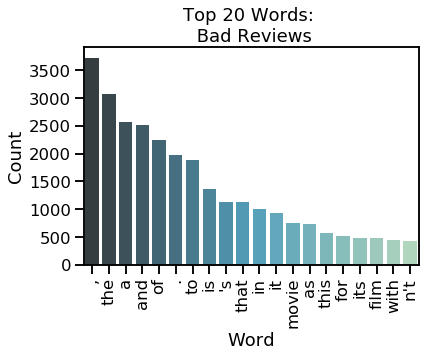

In [37]:
top_words_barplot(top_words_0, "Top 20 Words: \n Bad Reviews")

In [38]:
unique_total_words("uncleaned bad", words_0)

The total number of words in the uncleaned bad reviews is 85609
The total number of unique words in the uncleaned bad reviews is 7682


In [39]:
dic_1 = make_dic(reviews_1, "Phrase")

In [40]:
# word_cloud("bad.png", dic_1, "Somewhat Bad Reviews: \n Uncleaned")

In [41]:
words_1 = all_words_df(dic_1)
top_words_1 = top_words_df(words_1, 20)
top_words_1

count   word
0    9712    the
1    8847      ,
2    7327      a
3    6552     of
4    6078    and
5    5437     to
6    4432      .
7    3506     's
8    3324     is
9    2941   that
10   2863     in
11   2697     it
12   2127     as
13   1685    for
14   1608    its
15   1520    n't
16   1484   with
17   1365  movie
18   1266    but
19   1260   film

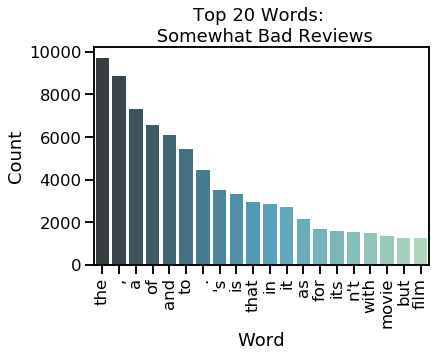

In [42]:
top_words_barplot(top_words_1, "Top 20 Words: \n Somewhat Bad Reviews")

In [43]:
unique_total_words("somewhat bad uncleaned", words_1)

The total number of words in the somewhat bad uncleaned reviews is 248512
The total number of unique words in the somewhat bad uncleaned reviews is 13400


In [44]:
dic_2 = make_dic(reviews_2, "Phrase")

In [46]:
# word_cloud("neutral.png", dic_2, "Neutral Reviews: \n Uncleaned")

In [47]:
words_2 = all_words_df(dic_2)
top_words_2 = top_words_df(words_2, 20)
top_words_2

count   word
0   18638    the
1   13141      ,
2   12126     of
3   11297      a
4   10062    and
5    8167     to
6    7001     's
7    5370     in
8    4114      .
9    3634     is
10   3607   that
11   3411     it
12   2851     as
13   2837    for
14   2498    its
15   2404   with
16   2131   film
17   1944     on
18   1898     be
19   1868  movie

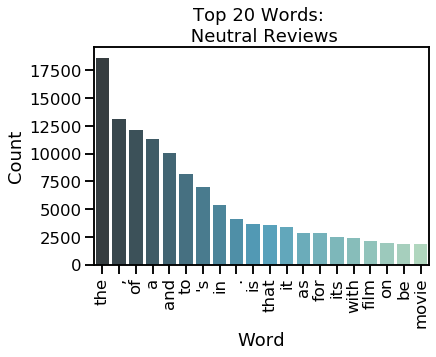

In [48]:
top_words_barplot(top_words_2, "Top 20 Words: \n Neutral Reviews")

In [49]:
unique_total_words("neutral uncleanned", words_2)

The total number of words in the neutral uncleanned reviews is 413398
The total number of unique words in the neutral uncleanned reviews is 17359


In [50]:
dic_3 = make_dic(reviews_3, "Phrase")

In [51]:
word_cloud("good.png", dic_3, "Somewhat Positive: \n Uncleaned")

FileNotFoundError: [Errno 2] No such file or directory: 'good.png'

In [52]:
words_3 = all_words_df(dic)
top_words_3 = top_words_df(words_3, 20)
top_words_3

count   word
0   46552    the
1   42006      ,
2   33443      a
3   32245     of
4   31695    and
5   22363     to
6   17565      .
7   16971     's
8   13523     in
9   13340     is
10  12175   that
11  10358     it
12   8415     as
13   7568   with
14   7273    for
15   6947    its
16   6626   film
17   5929     an
18   5827  movie
19   5064   this

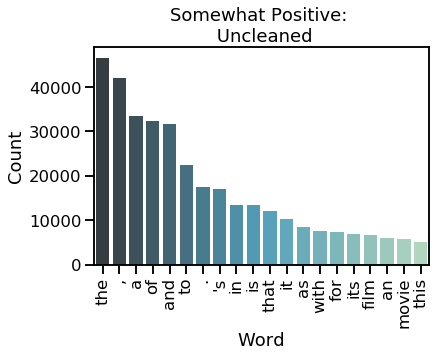

In [53]:
top_words_barplot(top_words_3, "Somewhat Positive: \n Uncleaned")

In [54]:
unique_total_words("somewhat positive uncleaned", words_3)

The total number of words in the somewhat positive uncleaned reviews is 1124157
The total number of unique words in the somewhat positive uncleaned reviews is 18226


In [55]:
dic_4 = make_dic(reviews_4, "Phrase")

In [56]:
word_cloud("best.png", dic_4, "Positive Reviews: \n Uncleaned")

FileNotFoundError: [Errno 2] No such file or directory: 'best.png'

In [57]:
words_4 = all_words_df(dic_4)
top_words_4 = top_words_df(words_4, 20)
top_words_4

count   word
0    4879      ,
1    3968    and
2    3819    the
3    3311      a
4    3022     of
5    2280      .
6    1547     is
7    1540     to
8    1329     's
9    1248   that
10   1045     in
11    930   film
12    912   with
13    739     it
14    713     as
15    664     an
16    564  movie
17    553    for
18    520      A
19    516    its

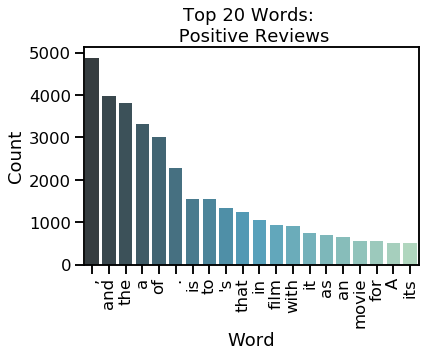

In [58]:
top_words_barplot(top_words_4, "Top 20 Words: \n Positive Reviews")

In [59]:
unique_total_words("positive uncleaned", words_4)

The total number of words in the positive uncleaned reviews is 98517
The total number of unique words in the positive uncleaned reviews is 7759


# Cleaning the Phrases 
    1. Make everything lowercase
    2. Change contractions 
    3. Remove punctuation 
    4. Tokenize 
    5. Stem 
    6. Remove stopwords 

In [60]:
def remove_contractions(df, column): 
    df[column] = df[column].str.replace(r"(can't)", "cannot")
    df[column] = df[column].str.replace(r"(n't)", " not")
    df[column] = df[column].str.replace(r"('s)", "")
    df[column] = df[column].str.replace(r"('m)", " am")
    df[column] = df[column].str.replace(r"('d)", " would")
    df[column] = df[column].str.replace(r"('ll)", " will")
    df[column] = df[column].str.replace(r"('ve)", " have")
    df[column] = df[column].str.replace(r"('re)", " are")
    return(df[column])

In [61]:
reviews["phrase"] = reviews["Phrase"].str.lower() 
reviews.phrase.head()

0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
Name: phrase, dtype: object

In [62]:
reviews["phrase"] = remove_contractions(reviews, "phrase") 
reviews.tail()

PhraseId  SentenceId                     Phrase  Sentiment  \
156055    156056        8544                  Hearst 's          2   
156056    156057        8544  forced avuncular chortles          1   
156057    156058        8544         avuncular chortles          3   
156058    156059        8544                  avuncular          2   
156059    156060        8544                   chortles          2   

                           phrase  
156055                    hearst   
156056  forced avuncular chortles  
156057         avuncular chortles  
156058                  avuncular  
156059                   chortles

In [63]:
reviews["phrase"] = reviews["phrase"].str.replace(r"[^\w^\s]", "")
reviews["phrase"] = reviews["phrase"].str.replace(r"[0-9]+", "")

In [64]:
import nltk 

In [65]:
reviews["phrase"] = reviews.apply(lambda row: nltk.word_tokenize(row["phrase"]), axis = 1)
reviews.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                             phrase  
0          1  [a, series, of, escapades, demonstrating, the,...  
1          2  [a, series, of, escapades, demonstrating, the,...  
2          2                                        [a, series]  
3          2                                                [a]  
4          2                                           [series]

In [66]:
from nltk.stem.snowball import SnowballStemmer

In [67]:
stemmer = SnowballStemmer("english")
reviews["stemmed"] = reviews.apply(lambda row: [stemmer.stem(token) for token in row["phrase"]], axis = 1)

In [68]:
reviews.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                             phrase  \
0          1  [a, series, of, escapades, demonstrating, the,...   
1          2  [a, series, of, escapades, demonstrating, the,...   
2          2                                        [a, series]   
3          2                                                [a]   
4          2                                           [series]   

                                             stemmed  
0  [a, seri, of, escapad, demonstr, the, adag, th...  
1  [a, seri, of, escapad, demonstr, the, adag, th...  
2                                          [a, seri]  
3                                                [a]  
4                                             [seri]

### Stopwords 

In [69]:
import re

In [70]:
#What the function does: It removes all words that have less than 3 characters in it. 
#Input: The string to have stopwords removed 
#Ouptut: The string with the words with 2 or less characters removed 
def remove_words_less_than_3_characters(string):
    new_string = ""
    for word in re.findall('[A-z][A-z]+\w', string): 
        new_string = new_string + " " + word
    return new_string

In [71]:
reviews["phrase_reduced"] = reviews.apply(lambda row: remove_words_less_than_3_characters(row["Phrase"]), axis =1 )

In [72]:
reviews.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                             phrase  \
0          1  [a, series, of, escapades, demonstrating, the,...   
1          2  [a, series, of, escapades, demonstrating, the,...   
2          2                                        [a, series]   
3          2                                                [a]   
4          2                                           [series]   

                                             stemmed  \
0  [a, seri, of, escapad, demonstr, the, adag, th...   
1  [a, seri, of, escapad, demonstr, the, adag, th...   
2                                          [a, seri]   
3                                                [a]   
4                                             [seri]   

                                      phrase_reduced  
0   series escapades demonstrating the adage that...  
1   series escapades demonstrating the adage that...  
2                                             series  
3                                                     
4                                             series

In [73]:
reviews["phrase_reduced"] = reviews.apply(lambda row: nltk.word_tokenize(row["phrase_reduced"]), axis = 1)
stemmer = SnowballStemmer("english")
reviews["reduced_stemmed"] = reviews.apply(lambda row: [stemmer.stem(token) for token in row["phrase_reduced"]], axis = 1)
reviews.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                             phrase  \
0          1  [a, series, of, escapades, demonstrating, the,...   
1          2  [a, series, of, escapades, demonstrating, the,...   
2          2                                        [a, series]   
3          2                                                [a]   
4          2                                           [series]   

                                             stemmed  \
0  [a, seri, of, escapad, demonstr, the, adag, th...   
1  [a, seri, of, escapad, demonstr, the, adag, th...   
2                                          [a, seri]   
3                                                [a]   
4                                             [seri]   

                                      phrase_reduced  \
0  [series, escapades, demonstrating, the, adage,...   
1  [series, escapades, demonstrating, the, adage,...   
2                                           [series]   
3                                                 []   
4                                           [series]   

                                     reduced_stemmed  
0  [seri, escapad, demonstr, the, adag, that, wha...  
1  [seri, escapad, demonstr, the, adag, that, wha...  
2                                             [seri]  
3                                                 []  
4                                             [seri]

In [74]:
#Generating a list of stop words from the first most commonly used words 
stop_words = ["the", "and", "you", "that", "was", "for", "with", "are", "his", "they", "one", "have", 
             "this", "from", "had", "word", "what", "some", "can", "out", "other", "were", "all", "there", 
             "when", "use", "your", "how", "said", "each", "she", "which", "their", "time", "will", "way", 
             "about", "many", "then", "them", "write", "would", "these", "her", "make", "thing", "see", "him", 
             "two", "has", "look", "more", "day", "could", "come", "did", "number", "sound", "people", "over", 
             "know", "than", "first", "who", "may", "down", "side", "been", "now", "find"]

In [75]:
reviews["further_reduced"] = reviews["phrase_reduced"].apply(lambda row: [word for word in row if word not in stop_words])

In [76]:
reviews["further_reduced_stemmed"] = reviews["reduced_stemmed"].apply(lambda row: [word for word in row if word not in stop_words])
reviews.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                             phrase  \
0          1  [a, series, of, escapades, demonstrating, the,...   
1          2  [a, series, of, escapades, demonstrating, the,...   
2          2                                        [a, series]   
3          2                                                [a]   
4          2                                           [series]   

                                             stemmed  \
0  [a, seri, of, escapad, demonstr, the, adag, th...   
1  [a, seri, of, escapad, demonstr, the, adag, th...   
2                                          [a, seri]   
3                                                [a]   
4                                             [seri]   

                                      phrase_reduced  \
0  [series, escapades, demonstrating, the, adage,...   
1  [series, escapades, demonstrating, the, adage,...   
2                                           [series]   
3                                                 []   
4                                           [series]   

                                     reduced_stemmed  \
0  [seri, escapad, demonstr, the, adag, that, wha...   
1  [seri, escapad, demonstr, the, adag, that, wha...   
2                                             [seri]   
3                                                 []   
4                                             [seri]   

                                     further_reduced  \
0  [series, escapades, demonstrating, adage, good...   
1  [series, escapades, demonstrating, adage, good...   
2                                           [series]   
3                                                 []   
4                                           [series]   

                             further_reduced_stemmed  
0  [seri, escapad, demonstr, adag, good, goos, al...  
1        [seri, escapad, demonstr, adag, good, goos]  
2                                             [seri]  
3                                                 []  
4                                             [seri]

# Visualizing All Reviews 

In [77]:
def get_df_ready_for_viz(df, column): 
    df[column] = df[column].apply(",".join)
    df[column] = df[column].str.replace(",", " ")
    return(df[column])

In [78]:
reviews_viz = reviews.copy()
columns = ["phrase_reduced", "reduced_stemmed", "further_reduced", "further_reduced_stemmed"]
for column in columns: 
    reviews_viz[column] = get_df_ready_for_viz(reviews_viz, column)
reviews_viz.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                             phrase  \
0          1  [a, series, of, escapades, demonstrating, the,...   
1          2  [a, series, of, escapades, demonstrating, the,...   
2          2                                        [a, series]   
3          2                                                [a]   
4          2                                           [series]   

                                             stemmed  \
0  [a, seri, of, escapad, demonstr, the, adag, th...   
1  [a, seri, of, escapad, demonstr, the, adag, th...   
2                                          [a, seri]   
3                                                [a]   
4                                             [seri]   

                                      phrase_reduced  \
0  series escapades demonstrating the adage that ...   
1  series escapades demonstrating the adage that ...   
2                                             series   
3                                                      
4                                             series   

                                     reduced_stemmed  \
0  seri escapad demonstr the adag that what good ...   
1  seri escapad demonstr the adag that what good ...   
2                                               seri   
3                                                      
4                                               seri   

                                     further_reduced  \
0  series escapades demonstrating adage good goos...   
1    series escapades demonstrating adage good goose   
2                                             series   
3                                                      
4                                             series   

                             further_reduced_stemmed  
0  seri escapad demonstr adag good goos also good...  
1               seri escapad demonstr adag good goos  
2                                               seri  
3                                                     
4                                               seri

## Phrase 

In [79]:
# dic_all = make_dic(reviews_viz, "phrase")
# word_cloud("tomatoes.png", dic_all, "Rotten Tomatoes: \n Cleaned Reviews")

In [80]:
# words_all = all_words_df(dic_all)
# top_words_all = top_words_df(words_all, 20)
# top_words_all

In [81]:
# top_words_barplot(top_words_all, "Top 20 Words: \n All Cleaned Reviews")

In [82]:
# unique_total_words("all cleaned", words_all)

In [83]:
reviews_0 = sentiment_subset(reviews_viz, 0)
reviews_0_viz = reviews_0.copy()
reviews_0_viz.head()

(7072, 10)


PhraseId  SentenceId                                             Phrase  \
0       102           3    would have a hard time sitting through this one   
1       104           3          have a hard time sitting through this one   
2       158           5  Aggressive self-glorification and a manipulati...   
3       160           5    self-glorification and a manipulative whitewash   
4       202           7             Trouble Every Day is a plodding mess .   

   Sentiment                                             phrase  \
0          0  [would, have, a, hard, time, sitting, through,...   
1          0  [have, a, hard, time, sitting, through, this, ...   
2          0  [aggressive, selfglorification, and, a, manipu...   
3          0  [selfglorification, and, a, manipulative, whit...   
4          0       [trouble, every, day, is, a, plodding, mess]   

                                             stemmed  \
0  [would, have, a, hard, time, sit, through, thi...   
1     [have, a, hard, time, sit, through, this, one]   
2  [aggress, selfglorif, and, a, manipul, whitewash]   
3           [selfglorif, and, a, manipul, whitewash]   
4            [troubl, everi, day, is, a, plod, mess]   

                                      phrase_reduced  \
0      would have hard time sitting through this one   
1            have hard time sitting through this one   
2  Aggressive self glorification and manipulative...   
3      self glorification and manipulative whitewash   
4                    Trouble Every Day plodding mess   

                             reduced_stemmed  \
0  would have hard time sit through this one   
1        have hard time sit through this one   
2  aggress self glorif and manipul whitewash   
3          self glorif and manipul whitewash   
4                 troubl everi day plod mess   

                                     further_reduced  \
0                               hard sitting through   
1                               hard sitting through   
2  Aggressive self glorification manipulative whi...   
3          self glorification manipulative whitewash   
4                    Trouble Every Day plodding mess   

                 further_reduced_stemmed  
0                       hard sit through  
1                       hard sit through  
2  aggress self glorif manipul whitewash  
3          self glorif manipul whitewash  
4                 troubl everi plod mess

In [84]:
reviews_1 = sentiment_subset(reviews_viz, 1)
reviews_1_viz = reviews_1.copy()
reviews_1_viz.head()

(27273, 10)


PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1        34           1  the gander , some of which occasionally amuses...   
2        48           1       but none of which amounts to much of a story   
3        50           1           none of which amounts to much of a story   
4        82           3  Even fans of Ismail Merchant 's work , I suspe...   

   Sentiment                                             phrase  \
0          1  [a, series, of, escapades, demonstrating, the,...   
1          1  [the, gander, some, of, which, occasionally, a...   
2          1  [but, none, of, which, amounts, to, much, of, ...   
3          1  [none, of, which, amounts, to, much, of, a, st...   
4          1  [even, fans, of, ismail, merchant, work, i, su...   

                                             stemmed  \
0  [a, seri, of, escapad, demonstr, the, adag, th...   
1  [the, gander, some, of, which, occasion, amus,...   
2  [but, none, of, which, amount, to, much, of, a...   
3  [none, of, which, amount, to, much, of, a, stori]   
4  [even, fan, of, ismail, merchant, work, i, sus...   

                                      phrase_reduced  \
0  series escapades demonstrating the adage that ...   
1  the gander some which occasionally amuses but ...   
2                  but none which amounts much story   
3                      none which amounts much story   
4  Even fans Ismail Merchant work suspect would h...   

                                     reduced_stemmed  \
0  seri escapad demonstr the adag that what good ...   
1  the gander some which occasion amus but none w...   
2                   but none which amount much stori   
3                       none which amount much stori   
4  even fan ismail merchant work suspect would ha...   

                                     further_reduced  \
0  series escapades demonstrating adage good goos...   
1  gander occasionally amuses but none amounts mu...   
2                        but none amounts much story   
3                            none amounts much story   
4  Even fans Ismail Merchant work suspect hard si...   

                             further_reduced_stemmed  
0  seri escapad demonstr adag good goos also good...  
1    gander occasion amus but none amount much stori  
2                         but none amount much stori  
3                             none amount much stori  
4  even fan ismail merchant work suspect hard sit...

In [85]:
reviews_2 = sentiment_subset(reviews_viz, 2)
reviews_2_viz = reviews_2.copy()
reviews_2_viz.head()

(79582, 10)


PhraseId  SentenceId                                             Phrase  \
0         2           1  A series of escapades demonstrating the adage ...   
1         3           1                                           A series   
2         4           1                                                  A   
3         5           1                                             series   
4         6           1  of escapades demonstrating the adage that what...   

   Sentiment                                             phrase  \
0          2  [a, series, of, escapades, demonstrating, the,...   
1          2                                        [a, series]   
2          2                                                [a]   
3          2                                           [series]   
4          2  [of, escapades, demonstrating, the, adage, tha...   

                                             stemmed  \
0  [a, seri, of, escapad, demonstr, the, adag, th...   
1                                          [a, seri]   
2                                                [a]   
3                                             [seri]   
4  [of, escapad, demonstr, the, adag, that, what,...   

                                      phrase_reduced  \
0  series escapades demonstrating the adage that ...   
1                                             series   
2                                                      
3                                             series   
4  escapades demonstrating the adage that what go...   

                                     reduced_stemmed  \
0  seri escapad demonstr the adag that what good ...   
1                                               seri   
2                                                      
3                                               seri   
4  escapad demonstr the adag that what good for t...   

                                   further_reduced  \
0  series escapades demonstrating adage good goose   
1                                           series   
2                                                    
3                                           series   
4         escapades demonstrating adage good goose   

                further_reduced_stemmed  
0  seri escapad demonstr adag good goos  
1                                  seri  
2                                        
3                                  seri  
4       escapad demonstr adag good goos

In [86]:
reviews_3 = sentiment_subset(reviews_viz, 3)
reviews_3_viz = reviews_3.copy()
reviews_3_viz.head()

(32927, 10)


PhraseId  SentenceId                                             Phrase  \
0        22           1                                 good for the goose   
1        23           1                                               good   
2        47           1                                             amuses   
3        65           2  This quiet , introspective and entertaining in...   
4        68           2             quiet , introspective and entertaining   

   Sentiment                                             phrase  \
0          3                            [good, for, the, goose]   
1          3                                             [good]   
2          3                                           [amuses]   
3          3  [this, quiet, introspective, and, entertaining...   
4          3          [quiet, introspective, and, entertaining]   

                                             stemmed  \
0                             [good, for, the, goos]   
1                                             [good]   
2                                             [amus]   
3  [this, quiet, introspect, and, entertain, inde...   
4                [quiet, introspect, and, entertain]   

                                      phrase_reduced  \
0                                 good for the goose   
1                                               good   
2                                             amuses   
3  This quiet introspective and entertaining inde...   
4               quiet introspective and entertaining   

                                reduced_stemmed  \
0                             good for the goos   
1                                          good   
2                                          amus   
3  this quiet introspect and entertain independ   
4                quiet introspect and entertain   

                                     further_reduced  \
0                                         good goose   
1                                               good   
2                                             amuses   
3  This quiet introspective entertaining independent   
4                   quiet introspective entertaining   

               further_reduced_stemmed  
0                            good goos  
1                                 good  
2                                 amus  
3  quiet introspect entertain independ  
4           quiet introspect entertain

In [87]:
reviews_4 = sentiment_subset(reviews_viz, 4)
reviews_4_viz = reviews_4.copy()
reviews_4_viz.head()

(9206, 10)


PhraseId  SentenceId                                             Phrase  \
0        64           2  This quiet , introspective and entertaining in...   
1        67           2  quiet , introspective and entertaining indepen...   
2        75           2                                       entertaining   
3        78           2                                   is worth seeking   
4       118           4  A positively thrilling combination of ethnogra...   

   Sentiment                                             phrase  \
0          4  [this, quiet, introspective, and, entertaining...   
1          4  [quiet, introspective, and, entertaining, inde...   
2          4                                     [entertaining]   
3          4                               [is, worth, seeking]   
4          4  [a, positively, thrilling, combination, of, et...   

                                             stemmed  \
0  [this, quiet, introspect, and, entertain, inde...   
1      [quiet, introspect, and, entertain, independ]   
2                                        [entertain]   
3                                  [is, worth, seek]   
4  [a, posit, thrill, combin, of, ethnographi, an...   

                                      phrase_reduced  \
0  This quiet introspective and entertaining inde...   
1   quiet introspective and entertaining independent   
2                                       entertaining   
3                                      worth seeking   
4  positively thrilling combination ethnography a...   

                                     reduced_stemmed  \
0  this quiet introspect and entertain independ w...   
1            quiet introspect and entertain independ   
2                                          entertain   
3                                         worth seek   
4  posit thrill combin ethnographi and all the in...   

                                     further_reduced  \
0  This quiet introspective entertaining independ...   
1       quiet introspective entertaining independent   
2                                       entertaining   
3                                      worth seeking   
4  positively thrilling combination ethnography i...   

                             further_reduced_stemmed  
0     quiet introspect entertain independ worth seek  
1                quiet introspect entertain independ  
2                                          entertain  
3                                         worth seek  
4  posit thrill combin ethnographi intrigu betray...

In [89]:
dic_0 = make_dic(reviews_0_viz, "phrase_reduced")
# word_cloud("horrible.png", dic_0, "Bad Reviews: \n Reduced")

In [90]:
words_0 = all_words_df(dic_0)
top_words_0 = top_words_df(words_0, 20)
top_words_0

count   word
0    3117    the
1    2544    and
2    1131   that
3     790  movie
4     576   this
5     535    for
6     488    its
7     477   film
8     437   with
9     433    bad
10    418    you
11    345    The
12    319   like
13    310   than
14    288    not
15    284    one
16    264   from
17    260    out
18    252    too
19    245   have

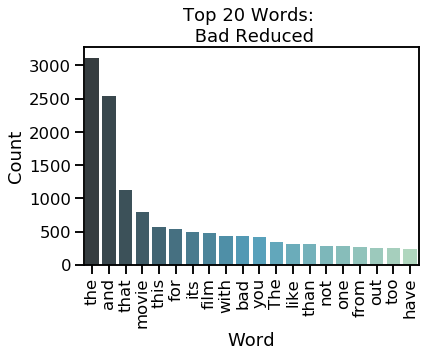

In [91]:
top_words_barplot(top_words_0, "Top 20 Words: \n Bad Reduced")

In [92]:
unique_total_words("bad reduced", words_0)

The total number of words in the bad reduced reviews is 62373
The total number of unique words in the bad reduced reviews is 7220


In [93]:
dic_1 = make_dic(reviews_1_viz, "phrase_reduced")
word_cloud("bad.png", dic_1, "Somewhat Bad Reviews: \n Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'bad.png'

In [ ]:
words_1 = all_words_df(dic_1)
top_words_1 = top_words_df(words_1, 20)
top_words_1

In [ ]:
top_words_barplot(top_words_1, "Top 20 Words: \n Somewhat Bad Reduced")

In [94]:
unique_total_words("somewhat bad reduced", words_1)

The total number of words in the somewhat bad reduced reviews is 248512
The total number of unique words in the somewhat bad reduced reviews is 13400


In [95]:
dic_2 = make_dic(reviews_2_viz, "phrase_reduced")
word_cloud("neutral.png", dic_2, "Neutral Reviews: \n Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'neutral.png'

In [ ]:
words_2 = all_words_df(dic_2)
top_words_2 = top_words_df(words_2, 20)
top_words_2

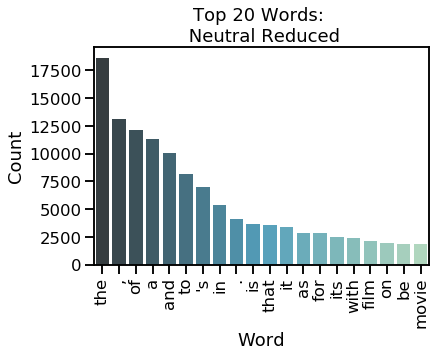

In [96]:
top_words_barplot(top_words_2, "Top 20 Words: \n Neutral Reduced")

In [97]:
unique_total_words("neutral reduced", words_2)

The total number of words in the neutral reduced reviews is 413398
The total number of unique words in the neutral reduced reviews is 17359


In [98]:
dic_3 = make_dic(reviews_3_viz, "phrase_reduced")
word_cloud("good.png", dic_3, "Good Reviews: \n Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'good.png'

In [ ]:
words_3 = all_words_df(dic_3)
top_words_3 = top_words_df(words_3, 20)
top_words_3

In [ ]:
top_words_barplot(top_words_3, "Top 20 Words: \n Somewhat Postive Reduced")

In [ ]:
unique_total_words("somewhat positive reduced", words_3)

In [ ]:
dic_4 = make_dic(reviews_4_viz, "phrase_reduced")
word_cloud("best.png", dic_4, "Positive Reviews: \n Reduced")

In [99]:
words_4 = all_words_df(dic_4)
top_words_4 = top_words_df(words_4, 20)
top_words_4

count   word
0    4879      ,
1    3968    and
2    3819    the
3    3311      a
4    3022     of
5    2280      .
6    1547     is
7    1540     to
8    1329     's
9    1248   that
10   1045     in
11    930   film
12    912   with
13    739     it
14    713     as
15    664     an
16    564  movie
17    553    for
18    520      A
19    516    its

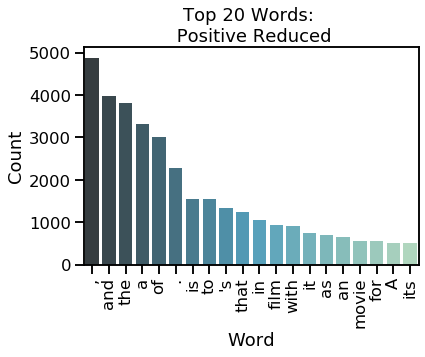

In [100]:
top_words_barplot(top_words_4, "Top 20 Words: \n Positive Reduced")

In [101]:
unique_total_words("positive reduced", words_4)

The total number of words in the positive reduced reviews is 98517
The total number of unique words in the positive reduced reviews is 7759


### Reduced Stemmed

In [103]:
dic_0 = make_dic(reviews_0_viz, "reduced_stemmed")
# word_cloud("horrible.png", dic_0, "Bad Reviews: \n Reduced Stemmed")

In [104]:
words_0 = all_words_df(dic_0)
top_words_0 = top_words_df(words_0, 20)
top_words_0

count  word
0    3462   the
1    2549   and
2    1139  that
3     862  movi
4     652  this
5     551  film
6     545   for
7     499   bad
8     492    it
9     452  with
10    437   you
11    357  like
12    310  than
13    304   one
14    301   not
15    285  have
16    268  from
17    260   out
18    259   all
19    256   too

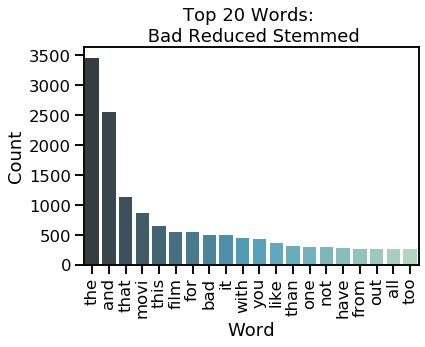

In [105]:
top_words_barplot(top_words_0, "Top 20 Words: \n Bad Reduced Stemmed")

In [106]:
unique_total_words("bad reduced stemmed", words_0)

The total number of words in the bad reduced stemmed reviews is 62373
The total number of unique words in the bad reduced stemmed reviews is 5084


In [107]:
dic_1 = make_dic(reviews_1_viz, "reduced_stemmed")
word_cloud("bad.png", dic_1, "Somewhat Bad Reviews: \n Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'bad.png'

In [ ]:
words_1 = all_words_df(dic_1)
top_words_1 = top_words_df(words_1, 20)
top_words_1

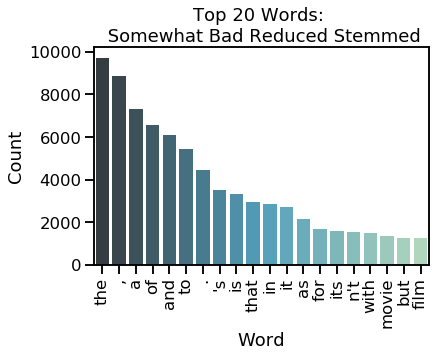

In [108]:
top_words_barplot(top_words_1, "Top 20 Words: \n Somewhat Bad Reduced Stemmed")

In [109]:
unique_total_words("somewhat bad reduced stemmed", words_1)

The total number of words in the somewhat bad reduced stemmed reviews is 248512
The total number of unique words in the somewhat bad reduced stemmed reviews is 13400


In [110]:
dic_2 = make_dic(reviews_2_viz, "reduced_stemmed")
word_cloud("neutral.png", dic_2, "Neutral Reviews: \n Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'neutral.png'

In [ ]:
words_2 = all_words_df(dic_2)
top_words_2 = top_words_df(words_2, 20)
top_words_2

In [ ]:
top_words_barplot(top_words_2, "Top 20 Words: \n Neutral Reduced Stemmed")

In [ ]:
unique_total_words("neutral reduced stemmed", words_2)

In [111]:
dic_3 = make_dic(reviews_3_viz, "reduced_stemmed")
word_cloud("good.png", dic_3, "Good Reviews: \n Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'good.png'

In [ ]:
words_3 = all_words_df(dic_3)
top_words_3 = top_words_df(words_3, 20)
top_words_3

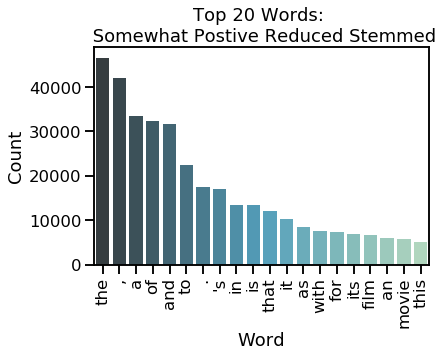

In [112]:
top_words_barplot(top_words_3, "Top 20 Words: \n Somewhat Postive Reduced Stemmed")

In [113]:
unique_total_words("somewhat positive reduced stemmed", words_3)

The total number of words in the somewhat positive reduced stemmed reviews is 1124157
The total number of unique words in the somewhat positive reduced stemmed reviews is 18226


In [114]:
dic_4 = make_dic(reviews_4_viz, "reduced_stemmed")
word_cloud("best.png", dic_4, "Positive Reviews: \n Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'best.png'

In [ ]:
words_4 = all_words_df(dic_4)
top_words_4 = top_words_df(words_4, 20)
top_words_4

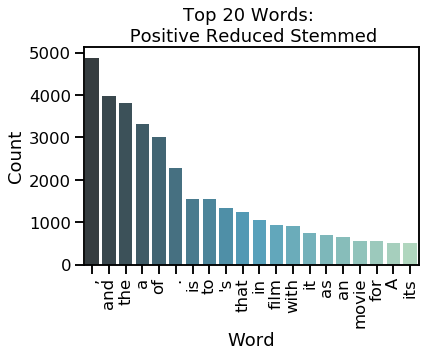

In [115]:
top_words_barplot(top_words_4, "Top 20 Words: \n Positive Reduced Stemmed")

In [116]:
unique_total_words("positive reduced stemmed", words_4)

The total number of words in the positive reduced stemmed reviews is 98517
The total number of unique words in the positive reduced stemmed reviews is 7759


### Further Reduced 

In [117]:
dic_0 = make_dic(reviews_0_viz, "further_reduced")
word_cloud("horrible.png", dic_0, "Bad Reviews: \n Further Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'horrible.png'

In [ ]:
words_0 = all_words_df(dic_0)
top_words_0 = top_words_df(words_0, 20)
top_words_0


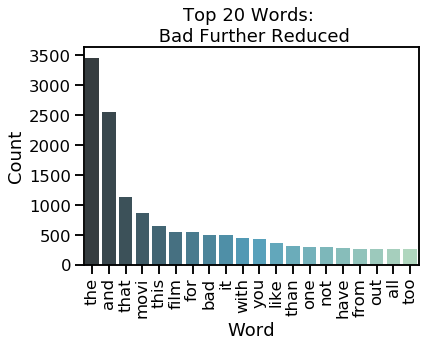

In [118]:
top_words_barplot(top_words_0, "Top 20 Words: \n Bad Further Reduced")

In [119]:
unique_total_words("bad further reduced", words_0)

The total number of words in the bad further reduced reviews is 62373
The total number of unique words in the bad further reduced reviews is 5084


In [120]:
dic_1 = make_dic(reviews_1_viz, "further_reduced")
word_cloud("bad.png", dic_1, "Somewhat Bad Reviews: \n Further Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'bad.png'

In [ ]:
words_1 = all_words_df(dic_1)
top_words_1 = top_words_df(words_1, 20)
top_words_1

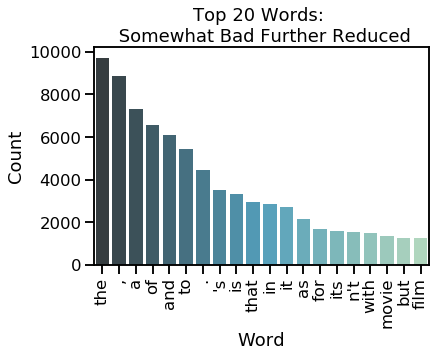

In [121]:
top_words_barplot(top_words_1, "Top 20 Words: \n Somewhat Bad Further Reduced")

In [122]:
unique_total_words("somewhat bad further reduced", words_1)

The total number of words in the somewhat bad further reduced reviews is 248512
The total number of unique words in the somewhat bad further reduced reviews is 13400


In [123]:
dic_2 = make_dic(reviews_2_viz, "further_reduced")
word_cloud("neutral.png", dic_2, "Neutral Reviews: \n Further Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'neutral.png'

In [ ]:
words_2 = all_words_df(dic_2)
top_words_2 = top_words_df(words_2, 20)
top_words_2

In [ ]:
top_words_barplot(top_words_2, "Top 20 Words: \n Neutral Further Reduced")

In [124]:
unique_total_words("neutral futher reduced", words_2)

The total number of words in the neutral futher reduced reviews is 413398
The total number of unique words in the neutral futher reduced reviews is 17359


In [125]:
dic_3 = make_dic(reviews_3_viz, "further_reduced")
word_cloud("good.png", dic_3, "Good Reviews: \n Further Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'good.png'

In [126]:
words_3 = all_words_df(dic_3)
top_words_3 = top_words_df(words_3, 20)
top_words_3

count        word
0    1837         its
1    1832        film
2    1405         but
3    1321       movie
4    1067         The
5     956        good
6     663       story
7     630       funny
8     618        most
9     618         not
10    572        into
11    561        well
12    551        like
13    551         RRB
14    526        life
15    512         LRB
16    497  characters
17    473      comedy
18    466        love
19    449      enough

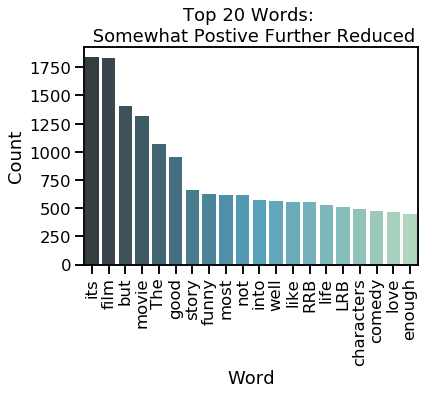

In [127]:
top_words_barplot(top_words_3, "Top 20 Words: \n Somewhat Postive Further Reduced")

In [128]:
unique_total_words("somewhat positive further reduced", words_3)

The total number of words in the somewhat positive further reduced reviews is 161729
The total number of unique words in the somewhat positive further reduced reviews is 12505


In [129]:
dic_4 = make_dic(reviews_4_viz, "further_reduced")
word_cloud("best.png", dic_4, "Positive Reviews: \n Further Reduced")

FileNotFoundError: [Errno 2] No such file or directory: 'best.png'

In [ ]:
words_4 = all_words_df(dic_4)
top_words_4 = top_words_df(words_4, 20)
top_words_4

In [ ]:
top_words_barplot(top_words_4, "Top 20 Words: \n Positive Further Reduced")

In [130]:
unique_total_words("positive further reduced", words_4)

The total number of words in the positive further reduced reviews is 98517
The total number of unique words in the positive further reduced reviews is 7759


### Further Reduced Stemmed 

In [131]:
dic_0 = make_dic(reviews_0_viz, "further_reduced_stemmed")
word_cloud("horrible.png", dic_0, "Bad Reviews: \n Further Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'horrible.png'

In [132]:
words_0 = all_words_df(dic_0)
top_words_0 = top_words_df(words_0, 20)
top_words_0

count     word
0     862     movi
1     551     film
2     499      bad
3     492       it
4     357     like
5     301      not
6     256      too
7     229      but
8     227  charact
9     224    minut
10    216     just
11    183   comedi
12    178     into
13    171     plot
14    167     even
15    165     feel
16    164    stori
17    153      ani
18    153     most
19    147     dull

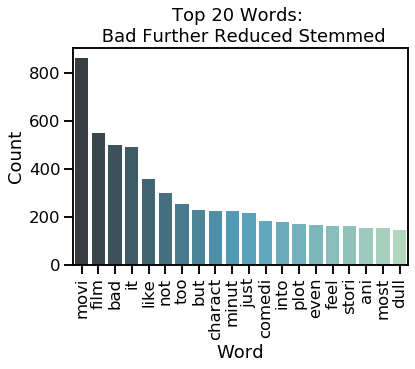

In [133]:
top_words_barplot(top_words_0, "Top 20 Words: \n Bad Further Reduced Stemmed")

In [134]:
unique_total_words("bad further reduced stemmed", words_0)

The total number of words in the bad further reduced stemmed reviews is 46182
The total number of unique words in the bad further reduced stemmed reviews is 5016


In [135]:
dic_1 = make_dic(reviews_1_viz, "further_reduced_stemmed")
word_cloud("bad.png", dic_1, "Somewhat Bad Reviews: \n Further Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'bad.png'

In [ ]:
words_1 = all_words_df(dic_1)
top_words_1 = top_words_df(words_1, 20)
top_words_1

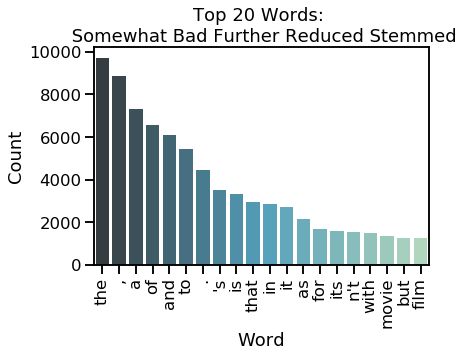

In [136]:
top_words_barplot(top_words_1, "Top 20 Words: \n Somewhat Bad Further Reduced Stemmed")

In [137]:
unique_total_words("somewhat bad further reduced stemmed", words_1)

The total number of words in the somewhat bad further reduced stemmed reviews is 248512
The total number of unique words in the somewhat bad further reduced stemmed reviews is 13400


In [138]:
dic_2 = make_dic(reviews_2_viz, "further_reduced_stemmed")
word_cloud("neutral.png", dic_2, "Neutral Reviews: \n Further Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'neutral.png'

In [ ]:
words_2 = all_words_df(dic_2)
top_words_2 = top_words_df(words_2, 20)
top_words_2

In [ ]:
top_words_barplot(top_words_2, "Top 20 Words: \n Neutral Further Reduced Stemmed")

In [ ]:
unique_total_words("neutral further reduced stemmed", words_2)

In [139]:
dic_3 = make_dic(reviews_3_viz, "further_reduced_stemmed")
word_cloud("good.png", dic_3, "Good Reviews: \n Further Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'good.png'

In [140]:
words_3 = all_words_df(dic_3)
top_words_3 = top_words_df(words_3, 20)
top_words_3

count     word
0    2080     film
1    1870       it
2    1639     movi
3    1434      but
4    1005     good
5     756  charact
6     739    stori
7     719     like
8     670     most
9     648      not
10    640     love
11    640    funni
12    607     work
13    581     well
14    572     into
15    552  perform
16    551      rrb
17    545   comedi
18    544     life
19    512      lrb

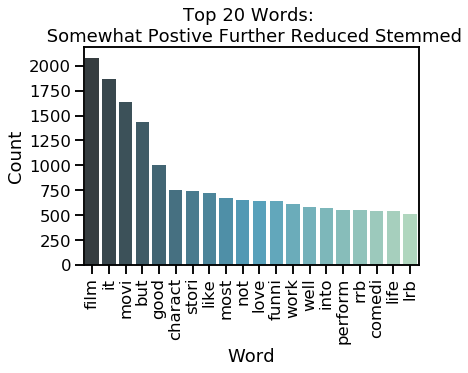

In [141]:
top_words_barplot(top_words_3, "Top 20 Words: \n Somewhat Postive Further Reduced Stemmed")

In [142]:
unique_total_words("somewhat positive reduced", words_3)

The total number of words in the somewhat positive reduced reviews is 158185
The total number of unique words in the somewhat positive reduced reviews is 8021


In [143]:
dic_4 = make_dic(reviews_4_viz, "further_reduced_stemmed")
word_cloud("best.png", dic_4, "Positive Reviews: \n Further Reduced Stemmed")

FileNotFoundError: [Errno 2] No such file or directory: 'best.png'

In [ ]:
words_4 = all_words_df(dic_4)
top_words_4 = top_words_df(words_4, 20)
top_words_4

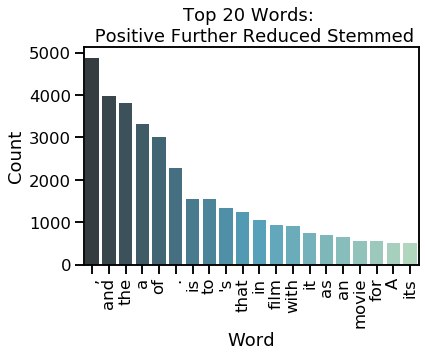

In [144]:
top_words_barplot(top_words_4, "Top 20 Words: \n Positive Further Reduced Stemmed")

In [145]:
unique_total_words("positive further reduced stemmed", words_4)

The total number of words in the positive further reduced stemmed reviews is 98517
The total number of unique words in the positive further reduced stemmed reviews is 7759


## Getting the data ready to run naive bayes and svms on it... 

To make the training data contain an equal number of rows for each sentiment. The sample function replce = False is utilized 

In [146]:
def make_df(column):
    df = pd.DataFrame()
    df["review"] = reviews[column]
    df["sentiment"] = reviews["Sentiment"]
    df.reset_index(drop = True, inplace = True)
    return(df)

In [147]:
reviews.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                             phrase  \
0          1  [a, series, of, escapades, demonstrating, the,...   
1          2  [a, series, of, escapades, demonstrating, the,...   
2          2                                        [a, series]   
3          2                                                [a]   
4          2                                           [series]   

                                             stemmed  \
0  [a, seri, of, escapad, demonstr, the, adag, th...   
1  [a, seri, of, escapad, demonstr, the, adag, th...   
2                                          [a, seri]   
3                                                [a]   
4                                             [seri]   

                                      phrase_reduced  \
0  [series, escapades, demonstrating, the, adage,...   
1  [series, escapades, demonstrating, the, adage,...   
2                                           [series]   
3                                                 []   
4                                           [series]   

                                     reduced_stemmed  \
0  [seri, escapad, demonstr, the, adag, that, wha...   
1  [seri, escapad, demonstr, the, adag, that, wha...   
2                                             [seri]   
3                                                 []   
4                                             [seri]   

                                     further_reduced  \
0  [series, escapades, demonstrating, adage, good...   
1  [series, escapades, demonstrating, adage, good...   
2                                           [series]   
3                                                 []   
4                                           [series]   

                             further_reduced_stemmed  
0  [seri, escapad, demonstr, adag, good, goos, al...  
1        [seri, escapad, demonstr, adag, good, goos]  
2                                             [seri]  
3                                                 []  
4                                             [seri]

In [148]:
phrase_reduced_df = make_df("phrase_reduced")
phrase_reduced_df.head()

review  sentiment
0  [series, escapades, demonstrating, the, adage,...          1
1  [series, escapades, demonstrating, the, adage,...          2
2                                           [series]          2
3                                                 []          2
4                                           [series]          2

In [149]:
reduced_stemmed_df = make_df("reduced_stemmed")
reduced_stemmed_df.head()

review  sentiment
0  [seri, escapad, demonstr, the, adag, that, wha...          1
1  [seri, escapad, demonstr, the, adag, that, wha...          2
2                                             [seri]          2
3                                                 []          2
4                                             [seri]          2

In [150]:
further_reduced_df = make_df("further_reduced")
further_reduced_df.head()

review  sentiment
0  [series, escapades, demonstrating, adage, good...          1
1  [series, escapades, demonstrating, adage, good...          2
2                                           [series]          2
3                                                 []          2
4                                           [series]          2

In [151]:
further_reduced_stemmed_df = make_df("further_reduced_stemmed")
further_reduced_stemmed_df.head()

review  sentiment
0  [seri, escapad, demonstr, adag, good, goos, al...          1
1        [seri, escapad, demonstr, adag, good, goos]          2
2                                             [seri]          2
3                                                 []          2
4                                             [seri]          2

# Models 

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [153]:
#What the function does: It takes the tokens from the df and joins it into a string, then replaces the "," with a space
#Input: the df and column to be changed 
#Output: the data untokenized 
def getting_data_ready_for_freq(df, column): 
    df[column] = df[column].apply(",".join)
    df[column] = df[column].str.replace(",", " ")
    return(df[column])

In [154]:
phrase_reduced_df["review"] = getting_data_ready_for_freq(phrase_reduced_df, "review")
reduced_stemmed_df["review"] = getting_data_ready_for_freq(reduced_stemmed_df, "review")
further_reduced_df["review"] = getting_data_ready_for_freq(further_reduced_df, "review")
further_reduced_stemmed_df["review"] = getting_data_ready_for_freq(further_reduced_stemmed_df, "review")

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
uni_vec = CountVectorizer(encoding='latin-1', binary=False, min_df=3)
bi_vec = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=3)
uni_tf_vec = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=3)
bigram_tf_vec = TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=(1,2), min_df=3)

In [156]:
model_1_uni_vec = uni_vec.fit_transform(phrase_reduced_df["review"])
model_1_bi_vec = bi_vec.fit_transform(phrase_reduced_df["review"])
model_1_uni_tf_vec = uni_tf_vec.fit_transform(phrase_reduced_df["review"])
model_1_bigram_tf_vec = bigram_tf_vec.fit_transform(phrase_reduced_df["review"])

In [157]:
model_2_uni_vec = uni_vec.fit_transform(reduced_stemmed_df["review"])
model_2_bi_vec = bi_vec.fit_transform(reduced_stemmed_df["review"])
model_2_uni_tf_vec = uni_tf_vec.fit_transform(reduced_stemmed_df["review"])
model_2_bigram_tf_vec = bigram_tf_vec.fit_transform(reduced_stemmed_df["review"])

In [158]:
model_3_uni_vec = uni_vec.fit_transform(further_reduced_df["review"])
model_3_bi_vec = bi_vec.fit_transform(further_reduced_df["review"])
model_3_uni_tf_vec = uni_tf_vec.fit_transform(further_reduced_df["review"])
model_3_bigram_tf_vec = bigram_tf_vec.fit_transform(further_reduced_df["review"])

In [159]:
model_4_uni_vec = uni_vec.fit_transform(further_reduced_stemmed_df["review"])
model_4_bi_vec = bi_vec.fit_transform(further_reduced_stemmed_df["review"])
model_4_uni_tf_vec = uni_tf_vec.fit_transform(further_reduced_stemmed_df["review"])
model_4_bigram_tf_vec = bigram_tf_vec.fit_transform(further_reduced_stemmed_df["review"])

In [160]:
# Creating testing and training df and labels 
model_1_uni_vec_train, model_1_uni_vec_test, label_model_1_uni_vec_train, label_model_1_uni_vec_test = train_test_split(model_1_uni_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_1_bi_vec_train, model_1_bi_vec_test, label_model_1_bi_vec_train, label_model_1_bi_vec_test = train_test_split(model_1_bi_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_1_uni_tf_vec_train, model_1_uni_tf_vec_test, label_model_1_uni_tf_vec_train, label_model_1_uni_tf_vec_test = train_test_split(model_1_uni_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_1_bigram_tf_vec_train, model_1_bigram_tf_vec_test, label_model_1_bigram_tf_vec_train, label_model_1_bigram_tf_vec_test = train_test_split(model_1_bigram_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.2, random_state = 12) 

In [161]:
# Creating testing and training df and labels 
model_2_uni_vec_train, model_2_uni_vec_test, label_model_2_uni_vec_train, label_model_2_uni_vec_test = train_test_split(model_2_uni_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_2_bi_vec_train, model_2_bi_vec_test, label_model_2_bi_vec_train, label_model_2_bi_vec_test = train_test_split(model_2_bi_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_2_uni_tf_vec_train, model_2_uni_tf_vec_test, label_model_2_uni_tf_vec_train, label_model_2_uni_tf_vec_test = train_test_split(model_2_uni_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_2_bigram_tf_vec_train, model_2_bigram_tf_vec_test, label_model_2_bigram_tf_vec_train, label_model_2_bigram_tf_vec_test = train_test_split(model_2_bigram_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 

In [162]:
# Creating testing and training df and labels 
model_3_uni_vec_train, model_3_uni_vec_test, label_model_3_uni_vec_train, label_model_3_uni_vec_test = train_test_split(model_3_uni_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_3_bi_vec_train, model_3_bi_vec_test, label_model_3_bi_vec_train, label_model_3_bi_vec_test = train_test_split(model_3_bi_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_3_uni_tf_vec_train, model_3_uni_tf_vec_test, label_model_3_uni_tf_vec_train, label_model_3_uni_tf_vec_test = train_test_split(model_3_uni_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_3_bigram_tf_vec_train, model_3_bigram_tf_vec_test, label_model_3_bigram_tf_vec_train, label_model_3_bigram_tf_vec_test = train_test_split(model_3_bigram_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 

In [163]:
# Creating testing and training df and labels 
model_4_uni_vec_train, model_4_uni_vec_test, label_model_4_uni_vec_train, label_model_4_uni_vec_test = train_test_split(model_4_uni_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_4_bi_vec_train, model_4_bi_vec_test, label_model_4_bi_vec_train, label_model_4_bi_vec_test = train_test_split(model_4_bi_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_4_uni_tf_vec_train, model_4_uni_tf_vec_test, label_model_4_uni_tf_vec_train, label_model_4_uni_tf_vec_test = train_test_split(model_4_uni_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 
model_4_bigram_tf_vec_train, model_4_bigram_tf_vec_test, label_model_4_bigram_tf_vec_train, label_model_4_bigram_tf_vec_test = train_test_split(model_4_bigram_tf_vec, phrase_reduced_df["sentiment"], test_size = 0.4, random_state = 12) 

In [164]:
from sklearn.metrics import accuracy_score
all_stats = []
def running_model(model, clf, train_df, train_label, test_df, test_label): 
    clf = clf
    clf.fit(train_df, train_label)
    predicted = clf.predict(test_df)
    accuracy = accuracy_score(test_label, predicted, normalize = True)
    data = [model, clf, accuracy]
    all_stats.append(data)
    results = pd.DataFrame(all_stats, columns = ["model", "classifier", "accuracy"])
    print("The accuracy is", accuracy)
    print("#----------------------------------------------------------------#")
    cm = confusion_matrix(test_label, predicted)
    print(cm)
    print("#----------------------------------------------------------------#")
    print(classification_report(test_label, predicted, target_names = ["0", "1", "2", "3", "4"]))
    return clf, results

In [172]:
print("Model 1 Unigram Vec")
clf, results = running_model("Model 1 Unigram Vec", MultinomialNB(), model_1_uni_vec_train, label_model_1_uni_vec_train, model_1_uni_vec_test, label_model_1_uni_vec_test)

print(clf)

Model 1 Unigram Vec
The accuracy is 0.603886325772139
#----------------------------------------------------------------#
[[  778  1340   642    86    13]
 [  750  4580  5072   595    54]
 [  283  2885 24725  3447   282]
 [   21   519  5226  6538   884]
 [    0    56   605  1967  1076]]
#----------------------------------------------------------------#
              precision    recall  f1-score   support

           0       0.42      0.27      0.33      2859
           1       0.49      0.41      0.45     11051
           2       0.68      0.78      0.73     31622
           3       0.52      0.50      0.51     13188
           4       0.47      0.29      0.36      3704

    accuracy                           0.60     62424
   macro avg       0.52      0.45      0.47     62424
weighted avg       0.59      0.60      0.59     62424

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [182]:


def return_features(vec, model):
#     print(vec)
    
    for i,feature_probability in enumerate(model.coef_):
        print('============ Sentiment Score: ', i)
        df1 = pd.DataFrame(sorted(zip(feature_probability, vec.get_feature_names()))[:10])
        df2 = pd.DataFrame(sorted(zip(feature_probability, vec.get_feature_names()))[-10:])
        df3 = pd.concat([df1, df2], axis=1)
        print(df3)
#         print(tabulate(df3, tablefmt="fancy_grid", headers=["Most","Likely","Least","Likely"], floatfmt=".2f"))

In [183]:
return_features(uni_vec, clf)

============ Sentiment Score:  0
           0        1         0         1
0 -10.857575      aaa -5.769979      lust
1 -10.857575  aaliyah -5.698520     tommi
2 -10.857575      aan -5.664618   terrifi
3 -10.857575  abagnal -5.529699  schepisi
4 -10.857575   abbass -5.262864     blunt
5 -10.857575   abbott -5.180821      rail
6 -10.857575      abc -5.153792    kouyat
7 -10.857575    abdul -5.037492   lighter
8 -10.857575    abhor -4.719848     style
9 -10.857575     abid -3.559130    assaya
============ Sentiment Score:  1
           0         1         0                1
0 -11.746732       aaa -5.470088      nonchalleng
1 -11.746732       aan -5.381981         schepisi
2 -11.746732   abagnal -5.331635  straightforward
3 -11.746732    abbott -5.170262          terrifi
4 -11.746732     abdul -5.114730           kouyat
5 -11.746732     abhor -5.062120         communal
6 -11.746732    abject -4.954388            style
7 -11.746732  aborigin -4.878758             rail
8 -11.746732    abound

In [197]:
print("Model 1 Bigram Vec")
results = running_model("Model 1 Bigram Vec", MultinomialNB(), model_1_bi_vec_train, label_model_1_bi_vec_train, model_1_bi_vec_test, label_model_1_bi_vec_test)

Model 1 Bigram Vec
The accuracy is 0.5912950147379213
#----------------------------------------------------------------#
[[ 1155  1315   331    44    14]
 [ 1269  5483  3673   560    66]
 [  581  4192 21625  4628   596]
 [   57   605  3923  7021  1582]
 [    9    42   297  1729  1627]]
#----------------------------------------------------------------#
              precision    recall  f1-score   support

           0       0.38      0.40      0.39      2859
           1       0.47      0.50      0.48     11051
           2       0.72      0.68      0.70     31622
           3       0.50      0.53      0.52     13188
           4       0.42      0.44      0.43      3704

    accuracy                           0.59     62424
   macro avg       0.50      0.51      0.50     62424
weighted avg       0.60      0.59      0.59     62424



In [185]:
results

(MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
                  model                                         classifier  \
 0  Model 1 Unigram Vec  MultinomialNB(alpha=1.0, class_prior=None, fit...   
 1  Model 1 Unigram Vec  MultinomialNB(alpha=1.0, class_prior=None, fit...   
 2   Model 1 Bigram Vec  MultinomialNB(alpha=1.0, class_prior=None, fit...   
 
    accuracy  
 0  0.603886  
 1  0.603886  
 2  0.591295  )

In [186]:
print("Model 1 Unigram TFIDF Vec")
results = running_model("Model 1 Unigram TFIDF Vec", MultinomialNB(), model_1_uni_tf_vec_train, label_model_1_uni_tf_vec_train, model_1_uni_tf_vec_test, label_model_1_uni_tf_vec_test)

Model 1 Unigram TFIDF Vec
The accuracy is 0.579040112777137
#----------------------------------------------------------------#
[[   71  1094  1644    50     0]
 [   38  2536  8190   287     0]
 [   10  1256 28537  1800    19]
 [    0   126  8146  4841    75]
 [    0    14  1446  2083   161]]
#----------------------------------------------------------------#
              precision    recall  f1-score   support

           0       0.60      0.02      0.05      2859
           1       0.50      0.23      0.32     11051
           2       0.59      0.90      0.72     31622
           3       0.53      0.37      0.44     13188
           4       0.63      0.04      0.08      3704

    accuracy                           0.58     62424
   macro avg       0.57      0.31      0.32     62424
weighted avg       0.57      0.58      0.52     62424



In [187]:
print("Model 1 Bigram TFIDF Vec")
running_model(MultinomialNB(), model_1_bigram_tf_vec_train, label_model_1_bigram_tf_vec_train, model_1_bigram_tf_vec_test, label_model_1_bigram_tf_vec_test)

Model 1 Bigram TFIDF Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [ ]:
print("Model 2 Unigram Vec")
running_model(MultinomialNB(), model_2_uni_vec_train, label_model_2_uni_vec_train, model_2_uni_vec_test, label_model_2_uni_vec_test)

In [188]:
print("Model 2 Bigram Vec")
running_model(MultinomialNB(), model_2_bi_vec_train, label_model_2_bi_vec_train, model_2_bi_vec_test, label_model_2_bi_vec_test)

Model 2 Bigram Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [189]:
print("Model 2 Unigram TFIDF Vec")
running_model(MultinomialNB(), model_2_uni_tf_vec_train, label_model_2_uni_tf_vec_train, model_2_uni_tf_vec_test, label_model_2_uni_tf_vec_test)

Model 2 Unigram TFIDF Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [190]:
print("Model 2 Bigram TFIDF Vec")
running_model(MultinomialNB(), model_2_bigram_tf_vec_train, label_model_2_bigram_tf_vec_train, model_2_bigram_tf_vec_test, label_model_2_bigram_tf_vec_test)

Model 2 Bigram TFIDF Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [191]:
print("Model 3 Unigram Vec")
running_model(MultinomialNB(), model_3_uni_vec_train, label_model_3_uni_vec_train, model_3_uni_vec_test, label_model_3_uni_vec_test)

Model 3 Unigram Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [192]:
print("Model 3 Bigram Vec")
running_model(MultinomialNB(), model_3_bi_vec_train, label_model_3_bi_vec_train, model_3_bi_vec_test, label_model_3_bi_vec_test)

Model 3 Bigram Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [193]:
print("Model 3 Unigram TFIDF Vec")
running_model(MultinomialNB(), model_3_uni_tf_vec_train, label_model_3_uni_tf_vec_train, model_3_uni_tf_vec_test, label_model_3_uni_tf_vec_test)

Model 3 Unigram TFIDF Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [194]:
print("Model 3 Bigram TFIDF Vec")
running_model(MultinomialNB(), model_3_bigram_tf_vec_train, label_model_3_bigram_tf_vec_train, model_3_bigram_tf_vec_test, label_model_3_bigram_tf_vec_test)

Model 3 Bigram TFIDF Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [195]:
print("Model 4 Unigram Vec")
running_model(MultinomialNB(), model_4_uni_vec_train, label_model_4_uni_vec_train, model_4_uni_vec_test, label_model_4_uni_vec_test)

Model 4 Unigram Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [196]:
print("Model 4 Bigram Vec")
running_model(MultinomialNB(), model_4_bi_vec_train, label_model_4_bi_vec_train, model_4_bi_vec_test, label_model_4_bi_vec_test)

Model 4 Bigram Vec


TypeError: running_model() missing 1 required positional argument: 'test_label'

In [ ]:
print("Model 4 Unigram TFIDF Vec")
running_model(MultinomialNB(), model_4_uni_tf_vec_train, label_model_4_uni_tf_vec_train, model_4_uni_tf_vec_test, label_model_4_uni_tf_vec_test)

In [ ]:
print("Model 4 Bigram TFIDF Vec")
running_model(MultinomialNB(), model_4_bigram_tf_vec_train, label_model_4_bigram_tf_vec_train, model_4_bigram_tf_vec_test, label_model_4_bigram_tf_vec_test)

# SVMS 

In [ ]:
from sklearn.svm import LinearSVC
print("Model 1 Unigram Vec")
running_model((LinearSVC(C=1)), model_1_uni_vec_train, label_model_1_uni_vec_train, model_1_uni_vec_test, label_model_1_uni_vec_test)


In [ ]:
print("Model 1 Bigram Vec")
running_model((LinearSVC(C=1)), model_1_bi_vec_train, label_model_1_bi_vec_train, model_1_bi_vec_test, label_model_1_bi_vec_test)

In [ ]:
print("Model 1 Unigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_1_uni_tf_vec_train, label_model_1_uni_tf_vec_train, model_1_uni_tf_vec_test, label_model_1_uni_tf_vec_test)

In [ ]:
print("Model 1 Bigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_1_bigram_tf_vec_train, label_model_1_bigram_tf_vec_train, model_1_bigram_tf_vec_test, label_model_1_bigram_tf_vec_test)

In [ ]:
print("Model 2 Unigram Vec")
running_model((LinearSVC(C=1)), model_2_uni_vec_train, label_model_2_uni_vec_train, model_2_uni_vec_test, label_model_2_uni_vec_test)

In [ ]:
print("Model 2 Bigram Vec")
running_model((LinearSVC(C=1)), model_2_bi_vec_train, label_model_2_bi_vec_train, model_2_bi_vec_test, label_model_2_bi_vec_test)

In [ ]:
print("Model 2 Unigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_2_uni_tf_vec_train, label_model_2_uni_tf_vec_train, model_2_uni_tf_vec_test, label_model_2_uni_tf_vec_test)

In [ ]:
print("Model 2 Bigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_2_bigram_tf_vec_train, label_model_2_bigram_tf_vec_train, model_2_bigram_tf_vec_test, label_model_2_bigram_tf_vec_test)

In [ ]:
print("Model 3 Unigram Vec")
running_model((LinearSVC(C=1)), model_3_uni_vec_train, label_model_3_uni_vec_train, model_3_uni_vec_test, label_model_3_uni_vec_test)

In [ ]:
print("Model 3 Bigram Vec")
running_model((LinearSVC(C=1)), model_3_bi_vec_train, label_model_3_bi_vec_train, model_3_bi_vec_test, label_model_3_bi_vec_test)

In [ ]:
print("Model 3 Unigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_3_uni_tf_vec_train, label_model_3_uni_tf_vec_train, model_3_uni_tf_vec_test, label_model_3_uni_tf_vec_test)

In [ ]:
print("Model 3 Bigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_3_bigram_tf_vec_train, label_model_3_bigram_tf_vec_train, model_3_bigram_tf_vec_test, label_model_3_bigram_tf_vec_test)

In [ ]:
print("Model 4 Unigram Vec")
running_model((LinearSVC(C=1)), model_4_uni_vec_train, label_model_4_uni_vec_train, model_4_uni_vec_test, label_model_4_uni_vec_test)

In [ ]:
print("Model 4 Bigram Vec")
running_model((LinearSVC(C=1)), model_4_bi_vec_train, label_model_4_bi_vec_train, model_4_bi_vec_test, label_model_4_bi_vec_test)

In [ ]:
print("Model 4 Unigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_4_uni_tf_vec_train, label_model_4_uni_tf_vec_train, model_4_uni_tf_vec_test, label_model_4_uni_tf_vec_test)

In [ ]:
print("Model 4 Bigram TFIDF Vec")
running_model((LinearSVC(C=1)), model_4_bigram_tf_vec_train, label_model_4_bigram_tf_vec_train, model_4_bigram_tf_vec_test, label_model_4_bigram_tf_vec_test)

In [ ]:
def return_features(vec, model):
    for i,feature_probability in enumerate(model.coef_):
        print('============ Sentiment Score: ', i)
        df1 = pd.DataFrame(sorted(zip(feature_probability, vec.get_feature_names()))[:10])
        df2 = pd.DataFrame(sorted(zip(feature_probability, vec.get_feature_names()))[-10:])
        df3 = pd.concat([df1, df2], axis=1)
        print(tabulate(df3, tablefmt="fancy_grid", headers=["Most","Likely","Least","Likely"], floatfmt=".2f"))